In [1]:
!git clone https://github.com/kishkath/ERA3.git

Cloning into 'ERA'...
remote: Enumerating objects: 944, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 944 (delta 7), reused 0 (delta 0), pack-reused 927 (from 1)
Receiving objects: 100% (944/944), 76.99 MiB | 34.90 MiB/s, done.
Resolving deltas: 100% (469/469), done.


In [2]:
import os

session_code_path = "/kaggle/working/ERA3/Session8"

os.chdir(session_code_path)

print(">>> Current working directory: ", os.getcwd())
print(">>> List of files available: ", os.listdir(session_code_path))

>>> Current working directory:  /kaggle/working/ERA/9 - Advanced Convolutions & Augmentations
>>> List of files available:  ['README.md', 'CIFAR10_V0.ipynb', 'utility', 'models']


In [3]:
## import utilties for the processing
# utility/ : contains scripts related to dataset, training, visualizations, other finetunings
# models/ : contains scripts with neural network architectures, lets create a new model here

from utility import * 

In [4]:
!pip install torchsummary

In [5]:
from utility.dataset import loader
from utility.run import Performance, scores
from utility.visualize import Plots, plot_metrics
from utility.utils import allot_device

import torch
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [6]:
 # Setting up the device with random seed for reproducibility

device = allot_device(42)
print(f"{device} is available")

cuda is available


In [7]:
# Download and load train & test datasets with providing batch-size, including data albumentations, processing
train_loader,test_loader = loader.load_data(128)
print(len(train_loader),len(test_loader))

100%|██████████| 170498071/170498071 [00:02<00:00, 75099052.70it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
391 79


<Figure size 640x480 with 0 Axes>

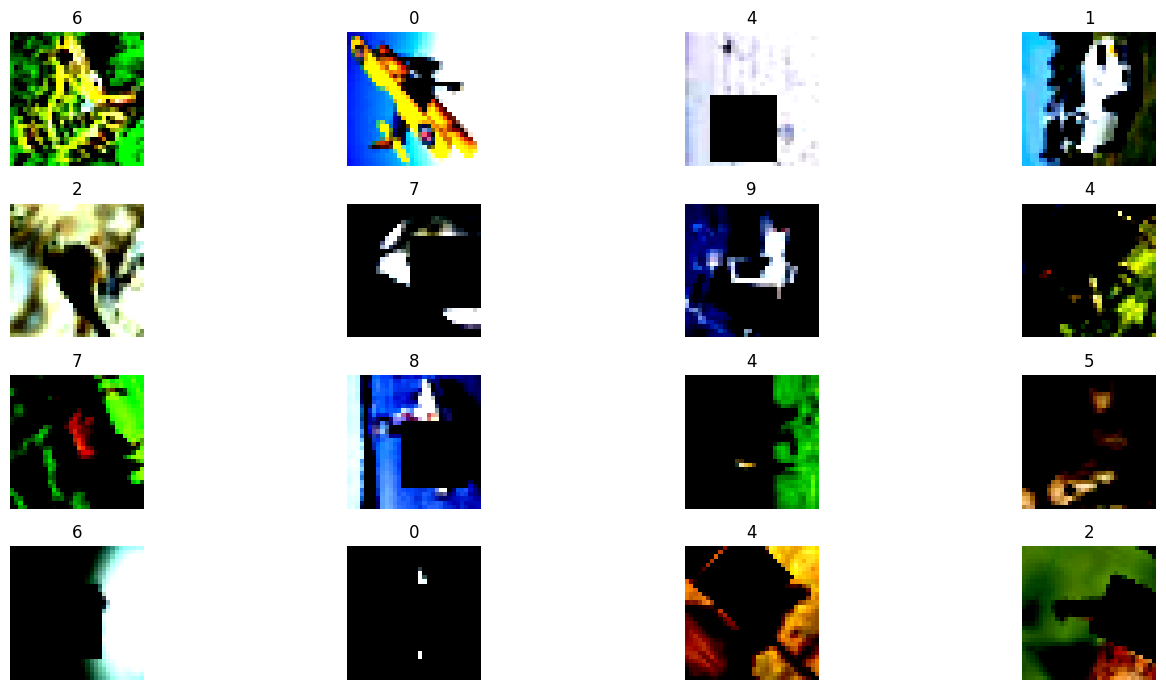

In [8]:
# Visualize train data by providing number of images to be displayed
Plots(None,17,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

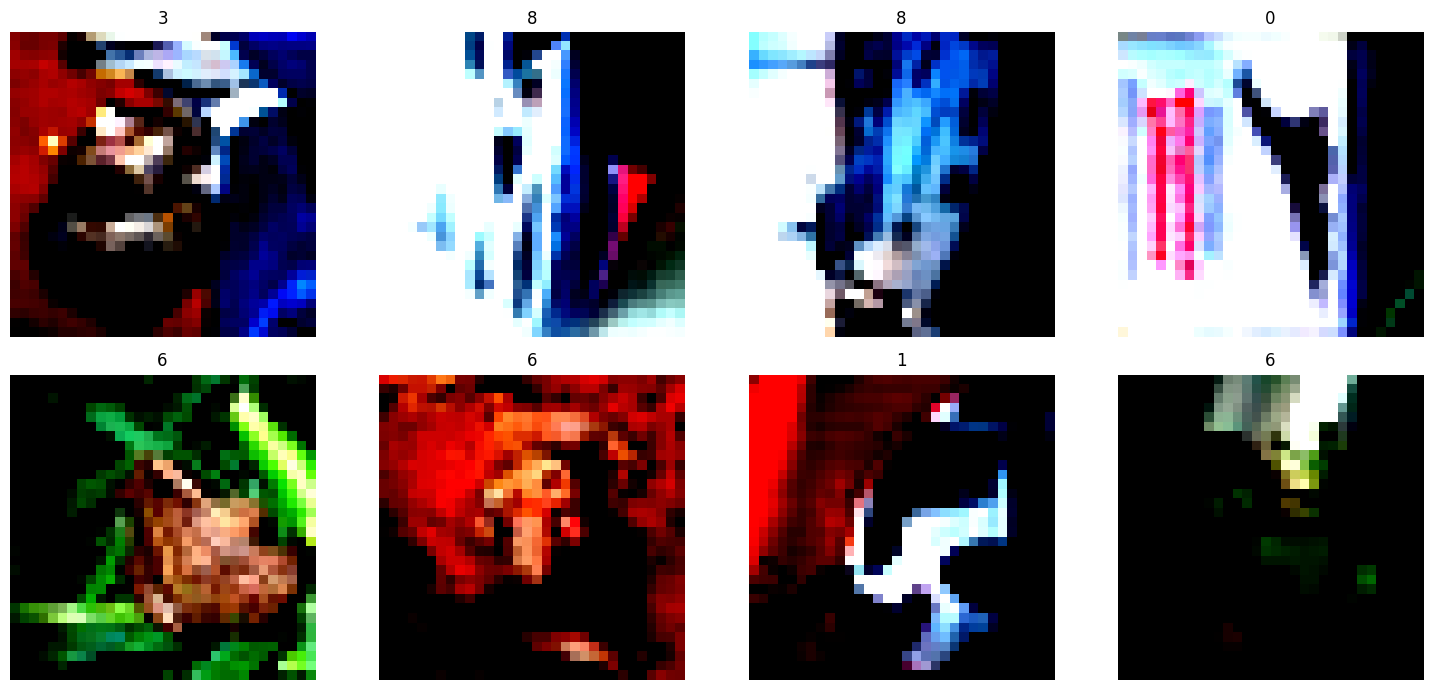

In [9]:
# Visualize test images

Plots(None,9,test_loader).plot_images()

#### Constraints: 
----------------

> Network that works on CIFAR10 Dataset

>> Architecture to C1C2C3C40 (No MaxPooling, but convolutions, where the last one has a stride of 2 instead)
>>  (NO restriction on using 1x1) (If you can figure out how to use Dilated kernels here instead of MP or strided convolution, then 200pts extra!)

>>> total RF must be more than 44

>>> one of the layers must use Depthwise Separable Convolution

>>> one of the layers must use Dilated Convolution

>>> use GAP (compulsory):- add FC after GAP to target #of classes (optional)

>>> use albumentation library and apply:

>>>> horizontal flip

>>>> shiftScaleRotate

>>>> coarseDropout (max_holes = 1, max_height=16px, max_width=16, min_holes = 1, min_height=16px, min_width=16px, fill_value=(mean of your dataset), mask_fill_value = None)

> achieve 85% accuracy, as many epochs as you want. Total Params to be less than 200

In [1]:
from models.model import NeuralNet

In [11]:
model = NeuralNet().to('cuda')
summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 64, 30, 30]          18,496
       BatchNorm2d-5           [-1, 64, 30, 30]             128
              ReLU-6           [-1, 64, 30, 30]               0
           Dropout-7           [-1, 64, 30, 30]               0
            Conv2d-8           [-1, 64, 30, 30]          36,928
       BatchNorm2d-9           [-1, 64, 30, 30]             128
             ReLU-10           [-1, 64, 30, 30]               0
           Conv2d-11          [-1, 128, 15, 15]          73,856
      BatchNorm2d-12          [-1, 128, 15, 15]             256
             ReLU-13          [-1, 128, 15, 15]               0
          Dropout-14          [-1, 128,

In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 60
perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion,[False,0.01])

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  perf.train()
  perf.test()
  # scheduler.step()

Epoch 1


Train: Loss=1.5533 Batch_id=390 Accuracy=36.20: 100%|██████████| 391/391 [02:05<00:00,  3.13it/s]


Test set: Average loss: 0.0108, Accuracy: 5004/10000 (50.04%)

Epoch 2


Train: Loss=1.3272 Batch_id=390 Accuracy=48.72: 100%|██████████| 391/391 [01:40<00:00,  3.90it/s]


Test set: Average loss: 0.0093, Accuracy: 5799/10000 (57.99%)

Epoch 3


Train: Loss=1.2761 Batch_id=390 Accuracy=53.49: 100%|██████████| 391/391 [02:05<00:00,  3.11it/s]


Test set: Average loss: 0.0081, Accuracy: 6367/10000 (63.67%)

Epoch 4


Train: Loss=1.2376 Batch_id=390 Accuracy=57.22: 100%|██████████| 391/391 [01:27<00:00,  4.47it/s]


Test set: Average loss: 0.0072, Accuracy: 6765/10000 (67.65%)

Epoch 5


Train: Loss=1.2741 Batch_id=390 Accuracy=60.10: 100%|██████████| 391/391 [01:35<00:00,  4.08it/s]


Test set: Average loss: 0.0070, Accuracy: 6904/10000 (69.04%)

Epoch 6


Train: Loss=1.0463 Batch_id=390 Accuracy=61.52: 100%|██████████| 391/391 [01:56<00:00,  3.36it/s]


Test set: Average loss: 0.0064, Accuracy: 7188/10000 (71.88%)

Epoch 7


Train: Loss=0.9657 Batch_id=390 Accuracy=63.46: 100%|██████████| 391/391 [01:46<00:00,  3.68it/s]


Test set: Average loss: 0.0063, Accuracy: 7259/10000 (72.59%)

Epoch 8


Train: Loss=0.8968 Batch_id=390 Accuracy=64.73: 100%|██████████| 391/391 [01:58<00:00,  3.31it/s]


Test set: Average loss: 0.0064, Accuracy: 7186/10000 (71.86%)

Epoch 9


Train: Loss=1.1566 Batch_id=390 Accuracy=65.82: 100%|██████████| 391/391 [01:58<00:00,  3.30it/s]


Test set: Average loss: 0.0063, Accuracy: 7279/10000 (72.79%)

Epoch 10


Train: Loss=0.9482 Batch_id=390 Accuracy=66.96: 100%|██████████| 391/391 [01:58<00:00,  3.31it/s]


Test set: Average loss: 0.0055, Accuracy: 7577/10000 (75.77%)

Epoch 11


Train: Loss=0.8907 Batch_id=390 Accuracy=67.66: 100%|██████████| 391/391 [01:44<00:00,  3.74it/s]


Test set: Average loss: 0.0058, Accuracy: 7441/10000 (74.41%)

Epoch 12


Train: Loss=0.8887 Batch_id=390 Accuracy=68.58: 100%|██████████| 391/391 [01:45<00:00,  3.70it/s]


Test set: Average loss: 0.0050, Accuracy: 7775/10000 (77.75%)

Epoch 13


Train: Loss=0.8945 Batch_id=390 Accuracy=69.17: 100%|██████████| 391/391 [01:43<00:00,  3.78it/s]


Test set: Average loss: 0.0050, Accuracy: 7851/10000 (78.51%)

Epoch 14


Train: Loss=0.6929 Batch_id=390 Accuracy=69.71: 100%|██████████| 391/391 [01:17<00:00,  5.06it/s]


Test set: Average loss: 0.0048, Accuracy: 7905/10000 (79.05%)

Epoch 15


Train: Loss=0.8931 Batch_id=390 Accuracy=70.47: 100%|██████████| 391/391 [01:45<00:00,  3.71it/s]


Test set: Average loss: 0.0049, Accuracy: 7834/10000 (78.34%)

Epoch 16


Train: Loss=0.7554 Batch_id=390 Accuracy=70.69: 100%|██████████| 391/391 [01:55<00:00,  3.39it/s]


Test set: Average loss: 0.0048, Accuracy: 7937/10000 (79.37%)

Epoch 17


Train: Loss=0.8726 Batch_id=390 Accuracy=71.40: 100%|██████████| 391/391 [01:37<00:00,  3.99it/s]


Test set: Average loss: 0.0047, Accuracy: 7982/10000 (79.82%)

Epoch 18


Train: Loss=0.6390 Batch_id=390 Accuracy=71.62: 100%|██████████| 391/391 [01:32<00:00,  4.23it/s]


Test set: Average loss: 0.0048, Accuracy: 7979/10000 (79.79%)

Epoch 19


Train: Loss=0.7082 Batch_id=390 Accuracy=72.10: 100%|██████████| 391/391 [01:55<00:00,  3.38it/s]


Test set: Average loss: 0.0044, Accuracy: 8113/10000 (81.13%)

Epoch 20


Train: Loss=0.8280 Batch_id=390 Accuracy=72.37: 100%|██████████| 391/391 [01:53<00:00,  3.46it/s]


Test set: Average loss: 0.0045, Accuracy: 8054/10000 (80.54%)

Epoch 21


Train: Loss=0.9850 Batch_id=390 Accuracy=72.75: 100%|██████████| 391/391 [01:32<00:00,  4.22it/s]


Test set: Average loss: 0.0044, Accuracy: 8102/10000 (81.02%)

Epoch 22


Train: Loss=0.7036 Batch_id=390 Accuracy=73.23: 100%|██████████| 391/391 [01:22<00:00,  4.72it/s]


Test set: Average loss: 0.0043, Accuracy: 8181/10000 (81.81%)

Epoch 23


Train: Loss=0.7682 Batch_id=390 Accuracy=73.08: 100%|██████████| 391/391 [01:31<00:00,  4.26it/s]


Test set: Average loss: 0.0042, Accuracy: 8182/10000 (81.82%)

Epoch 24


Train: Loss=0.7611 Batch_id=390 Accuracy=73.80: 100%|██████████| 391/391 [01:41<00:00,  3.87it/s]


Test set: Average loss: 0.0044, Accuracy: 8054/10000 (80.54%)

Epoch 25


Train: Loss=0.7633 Batch_id=390 Accuracy=73.87: 100%|██████████| 391/391 [01:50<00:00,  3.55it/s]


Test set: Average loss: 0.0040, Accuracy: 8238/10000 (82.38%)

Epoch 26


Train: Loss=0.9252 Batch_id=390 Accuracy=74.30: 100%|██████████| 391/391 [01:33<00:00,  4.19it/s]


Test set: Average loss: 0.0039, Accuracy: 8284/10000 (82.84%)

Epoch 27


Train: Loss=0.9278 Batch_id=390 Accuracy=74.46: 100%|██████████| 391/391 [01:46<00:00,  3.67it/s]


Test set: Average loss: 0.0039, Accuracy: 8346/10000 (83.46%)

Epoch 28


Train: Loss=0.8575 Batch_id=390 Accuracy=74.39: 100%|██████████| 391/391 [01:30<00:00,  4.32it/s]


Test set: Average loss: 0.0039, Accuracy: 8331/10000 (83.31%)

Epoch 29


Train: Loss=0.8292 Batch_id=390 Accuracy=75.10: 100%|██████████| 391/391 [01:59<00:00,  3.27it/s]


Test set: Average loss: 0.0042, Accuracy: 8237/10000 (82.37%)

Epoch 30


Train: Loss=0.6525 Batch_id=390 Accuracy=74.90: 100%|██████████| 391/391 [01:46<00:00,  3.68it/s]


Test set: Average loss: 0.0042, Accuracy: 8226/10000 (82.26%)

Epoch 31


Train: Loss=0.8024 Batch_id=390 Accuracy=74.92: 100%|██████████| 391/391 [01:40<00:00,  3.91it/s]


Test set: Average loss: 0.0038, Accuracy: 8342/10000 (83.42%)

Epoch 32


Train: Loss=0.6414 Batch_id=390 Accuracy=75.58: 100%|██████████| 391/391 [01:39<00:00,  3.94it/s]


Test set: Average loss: 0.0038, Accuracy: 8395/10000 (83.95%)

Epoch 33


Train: Loss=0.3940 Batch_id=390 Accuracy=75.62: 100%|██████████| 391/391 [01:25<00:00,  4.56it/s]


Test set: Average loss: 0.0037, Accuracy: 8392/10000 (83.92%)

Epoch 34


Train: Loss=0.6093 Batch_id=390 Accuracy=75.69: 100%|██████████| 391/391 [01:45<00:00,  3.71it/s]


Test set: Average loss: 0.0038, Accuracy: 8346/10000 (83.46%)

Epoch 35


Train: Loss=0.6783 Batch_id=390 Accuracy=75.95: 100%|██████████| 391/391 [01:43<00:00,  3.79it/s]


Test set: Average loss: 0.0037, Accuracy: 8378/10000 (83.78%)

Epoch 36


Train: Loss=0.7256 Batch_id=390 Accuracy=75.97: 100%|██████████| 391/391 [01:34<00:00,  4.13it/s]


Test set: Average loss: 0.0038, Accuracy: 8373/10000 (83.73%)

Epoch 37


Train: Loss=0.5098 Batch_id=390 Accuracy=76.46: 100%|██████████| 391/391 [01:35<00:00,  4.11it/s]


Test set: Average loss: 0.0038, Accuracy: 8388/10000 (83.88%)

Epoch 38


Train: Loss=0.7101 Batch_id=390 Accuracy=76.18: 100%|██████████| 391/391 [01:41<00:00,  3.87it/s]


Test set: Average loss: 0.0037, Accuracy: 8417/10000 (84.17%)

Epoch 39


Train: Loss=0.5465 Batch_id=390 Accuracy=76.45: 100%|██████████| 391/391 [01:40<00:00,  3.88it/s]


Test set: Average loss: 0.0035, Accuracy: 8482/10000 (84.82%)

Epoch 40


Train: Loss=0.7991 Batch_id=390 Accuracy=76.65: 100%|██████████| 391/391 [02:00<00:00,  3.25it/s]


Test set: Average loss: 0.0037, Accuracy: 8430/10000 (84.30%)

Epoch 41


Train: Loss=0.8221 Batch_id=390 Accuracy=76.61: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]


Test set: Average loss: 0.0036, Accuracy: 8466/10000 (84.66%)

Epoch 42


Train: Loss=0.6489 Batch_id=390 Accuracy=76.95: 100%|██████████| 391/391 [01:35<00:00,  4.10it/s]


Test set: Average loss: 0.0037, Accuracy: 8457/10000 (84.57%)

Epoch 43


Train: Loss=0.6136 Batch_id=390 Accuracy=76.93: 100%|██████████| 391/391 [01:46<00:00,  3.68it/s]


Test set: Average loss: 0.0036, Accuracy: 8457/10000 (84.57%)

Epoch 44


Train: Loss=0.6726 Batch_id=390 Accuracy=77.30: 100%|██████████| 391/391 [01:51<00:00,  3.49it/s]


Test set: Average loss: 0.0037, Accuracy: 8442/10000 (84.42%)

Epoch 45


Train: Loss=0.6668 Batch_id=390 Accuracy=77.35: 100%|██████████| 391/391 [01:51<00:00,  3.50it/s]


Test set: Average loss: 0.0035, Accuracy: 8467/10000 (84.67%)

Epoch 46


Train: Loss=0.6567 Batch_id=390 Accuracy=77.37: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]


Test set: Average loss: 0.0037, Accuracy: 8430/10000 (84.30%)

Epoch 47


Train: Loss=0.7390 Batch_id=390 Accuracy=77.51: 100%|██████████| 391/391 [01:43<00:00,  3.77it/s]


Test set: Average loss: 0.0034, Accuracy: 8557/10000 (85.57%)

Epoch 48


Train: Loss=0.5536 Batch_id=390 Accuracy=77.60: 100%|██████████| 391/391 [01:40<00:00,  3.89it/s]


Test set: Average loss: 0.0036, Accuracy: 8475/10000 (84.75%)

Epoch 49


Train: Loss=0.7201 Batch_id=390 Accuracy=77.87: 100%|██████████| 391/391 [01:37<00:00,  4.01it/s]


Test set: Average loss: 0.0035, Accuracy: 8493/10000 (84.93%)

Epoch 50


Train: Loss=0.4808 Batch_id=390 Accuracy=77.90: 100%|██████████| 391/391 [01:56<00:00,  3.36it/s]


Test set: Average loss: 0.0034, Accuracy: 8530/10000 (85.30%)

Epoch 51


Train: Loss=0.5636 Batch_id=390 Accuracy=77.62: 100%|██████████| 391/391 [01:49<00:00,  3.56it/s]


Test set: Average loss: 0.0036, Accuracy: 8435/10000 (84.35%)

Epoch 52


Train: Loss=0.5874 Batch_id=390 Accuracy=78.27: 100%|██████████| 391/391 [01:45<00:00,  3.71it/s]


Test set: Average loss: 0.0034, Accuracy: 8505/10000 (85.05%)

Epoch 53


Train: Loss=0.8121 Batch_id=390 Accuracy=78.04: 100%|██████████| 391/391 [02:02<00:00,  3.20it/s]


Test set: Average loss: 0.0035, Accuracy: 8475/10000 (84.75%)

Epoch 54


Train: Loss=0.7317 Batch_id=390 Accuracy=78.22: 100%|██████████| 391/391 [02:05<00:00,  3.12it/s]


Test set: Average loss: 0.0033, Accuracy: 8575/10000 (85.75%)

Epoch 55


Train: Loss=0.5824 Batch_id=390 Accuracy=78.52: 100%|██████████| 391/391 [01:58<00:00,  3.30it/s]


Test set: Average loss: 0.0035, Accuracy: 8537/10000 (85.37%)

Epoch 56


Train: Loss=0.6307 Batch_id=390 Accuracy=78.30: 100%|██████████| 391/391 [01:33<00:00,  4.18it/s]


Test set: Average loss: 0.0032, Accuracy: 8579/10000 (85.79%)

Epoch 57


Train: Loss=0.7012 Batch_id=390 Accuracy=78.20: 100%|██████████| 391/391 [01:43<00:00,  3.80it/s]


Test set: Average loss: 0.0032, Accuracy: 8581/10000 (85.81%)

Epoch 58


Train: Loss=0.5891 Batch_id=390 Accuracy=78.52: 100%|██████████| 391/391 [01:36<00:00,  4.04it/s]


Test set: Average loss: 0.0034, Accuracy: 8536/10000 (85.36%)

Epoch 59


Train: Loss=0.5859 Batch_id=390 Accuracy=78.45: 100%|██████████| 391/391 [01:43<00:00,  3.76it/s]


Test set: Average loss: 0.0033, Accuracy: 8562/10000 (85.62%)

Epoch 60


Train: Loss=0.7725 Batch_id=390 Accuracy=78.71: 100%|██████████| 391/391 [01:23<00:00,  4.71it/s]


Test set: Average loss: 0.0033, Accuracy: 8581/10000 (85.81%)

